# Pandas, Matplotlib and Seaborn

In [ ]:
import pandas as pd

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

In [ ]:
df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

# EDA (Exploratory Data Analysis)

In [ ]:
df

In [ ]:
mean_value = df['IMF_Estimate'].mean()

mean_value

In [ ]:
filtered_df = df[df['IMF_Estimate'] < 15351.632286995517]
filtered_df

In [ ]:
df.sample(10)

## Which countries below average by IMF world estimate?

### IMF estimate 0 values

In [ ]:
imf0_df = df[df['IMF_Estimate'] == 0]
imf0_df

In [ ]:
findUK = df[df['Country/Territory'] == "United Kingdom"]
findUK

## Which country has highest UN Estimate?

In [ ]:
df[df['UN_Estimate'].max()]

In [ ]:
unhigh = df[df['UN_Estimate'] == df['UN_Estimate'].max()]
unhigh

## Which country has highest Worlbank Estimate?

In [ ]:
wbhigh = df[df['WorldBank_Estimate'] == df['WorldBank_Estimate'].max()]
wbhigh

## Which country has highest IMF Estimate?

In [ ]:
imfhigh = df[df['IMF_Estimate'] == df['IMF_Estimate'].max()]
imfhigh

In [ ]:
row_index = 1  # Replace with the index of the row you want to modify
attribute_to_remove = 'UN_Region'  # Replace with the name of the attribute you want to remove

# Drop the specified attribute for the specified row
df.at[row_index, attribute_to_remove] = ''  # Set the value to None or any other appropriate replacement

# Display the updated DataFrame
print(df)

In [ ]:
df

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df

## Checking Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)


In [ ]:
regions = df['UN_Region'].unique()
regions

In [ ]:
df[df["UN_Region"]=="Asia"].head(1)

In [ ]:
df[df["UN_Region"]=="Asia"].nlargest(1, columns="UN_Estimate")

In [ ]:
df[df["UN_Region"]=="Asia"].nsmallest(1, columns="UN_Estimate")

In [ ]:
df[df['IMF_Estimate'] == 0, 'IMF_Estimate'] = df['WorldBank_Estimate'] + df['UN_Estimate']/2

df

In [ ]:
df.loc[df['IMF_Estimate'] == 0, 'IMF_Estimate'] = (df['WorldBank_Estimate'] + df['UN_Estimate'])/2

In [ ]:
df.loc[df['IMF_Estimate'] == 0, 'IMF_Estimate'] = df['WorldBank_Estimate'] + df['UN_Estimate']/2

df

## group by function

[group by learn](https://www.geeksforgeeks.org/pandas-groupby/)

[group by learn](https://www.w3schools.com/mysql/mysql_groupby.asp)

In [ ]:
df

In [ ]:
df.groupby("UN_Region").mean(numeric_only=True)

In [ ]:
df.groupby("UN_Region").sum(numeric_only=True)

In [ ]:
df.groupby("WorldBank_Year").mean(numeric_only=True)

In [ ]:
below_threshold_rows = df[(df['IMF_Estimate'] < IMF_average) & (df['IMF_Estimate'] != 0 )]

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

In [ ]:
df.hist(figsize=(12,9))
plt.show()

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9))

plt.show()

In [ ]:
df["WorldBank_Estimate"].agg(["min","max"])

In [ ]:
234316/5
#1 bin size if bins=5

In [ ]:
234316/10
#1 bin size if bins not given any number

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=15, figsize=(15,12))


plt.show()

### Correlation Heatmap

In [ ]:
df.corr(numeric_only=True)

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True)

plt.show()

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'GnBu')

plt.show()

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.title("Correlation Map")


plt.show()

### Bar plot

In [ ]:
df.head()

In [ ]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, ci=None)

plt.show()

In [ ]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, ci=None)

plt.show()

In [ ]:
fig = plt.figure(figsize = (8,5))

ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",  
data = df, errorbar=None)

ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
fig = plt.figure(figsize = (8,5)) 
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate", 
                 data = df, ci = None) 

ax.bar_label(ax.containers[0]) 


ax.set_title("My title")
plt.show()

### Scatter Plot

In [ ]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

### Boxplot and Outliers

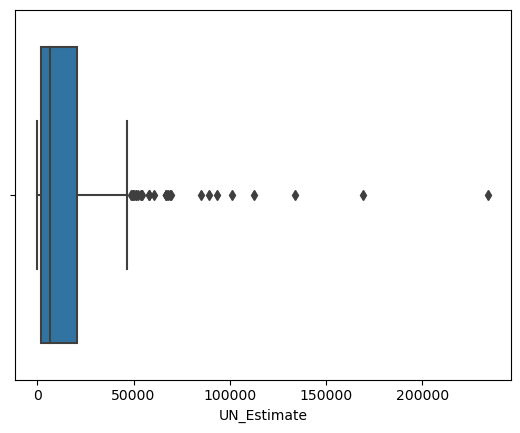

In [86]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [87]:
df[df["UN_Estimate"]>50000].head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


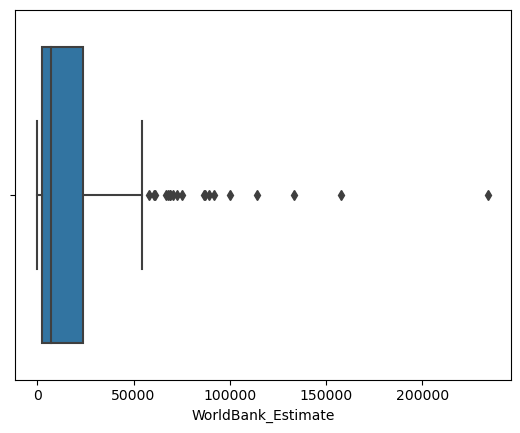

In [88]:
sns.boxplot(x=df["WorldBank_Estimate"])

plt.show()

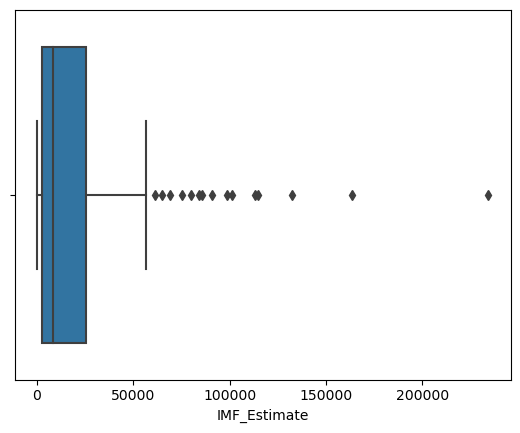

In [89]:
sns.boxplot(x=df["IMF_Estimate"])

plt.show()

In [90]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


In [91]:
df.UN_Estimate.mean()

17767.304932735427

In [92]:
df.shape

(223, 8)

## Create another dataframe called data excluding  5 countries with highest UN estimate

In [93]:
data = df[-(df["UN_Estimate"]>100000)]

In [94]:
data.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
6,Norway,Europe,101103.0,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767.0,2023,91992,2021,93525,2021
8,Singapore,Asia,91100.0,2023,72794,2021,66822,2021
9,Isle of Man,Europe,43579.0,0,87158,2019,0,0
10,Cayman Islands,Americas,85909.5,0,86569,2021,85250,2021


In [95]:
data.shape

(218, 8)

In [96]:
data.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
6,Norway,Europe,101103.0,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767.0,2023,91992,2021,93525,2021
8,Singapore,Asia,91100.0,2023,72794,2021,66822,2021
9,Isle of Man,Europe,43579.0,0,87158,2019,0,0
10,Cayman Islands,Americas,85909.5,0,86569,2021,85250,2021


In [97]:
data.UN_Estimate.mean()

14729.47247706422

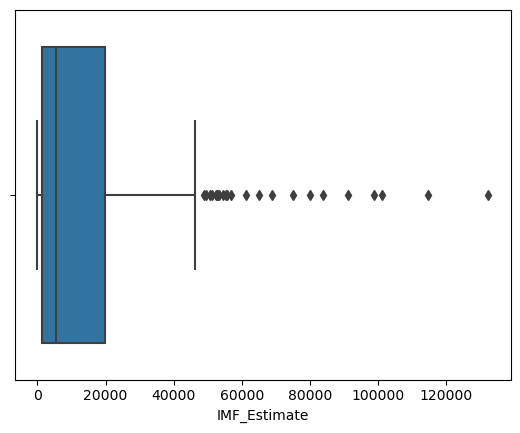

In [ ]:
sns.boxplot(x=data["UN_Estimate"])
plt.show()

## Removing outliers

In [ ]:
lower_q = df["UN_Estimate"].quantile(0.25)
lower_q


In [ ]:
higher_q = df["UN_Estimate"].quantile(0.75)
higher_q

In [ ]:
df_filtered = df[(df["UN_Estimate"] < higher_q) & (df["UN_Estimate"] > lower_q)]

In [ ]:
df_filtered.head()

In [ ]:
df_filtered.shape

##### There were 223 rows. now there are only around half.

In [ ]:
df_filtered.UN_Estimate.mean()

In [ ]:
#how can we create a table with following 
df_filtered.WorldBank_Estimate.mean()

In [ ]:
df_filtered.UN_Estimate.mean()


In [ ]:
df_filtered.IMF_Estimate.mean()

In [ ]:
df["UN_Estimate"].median()

In [ ]:
df["UN_Estimate"].quantile(0.25)

In [ ]:
df[(df["UN_Estimate"]<=df["UN_Estimate"].quantile(0.75)) & (df["UN_Estimate"]>=df["UN_Estimate"].quantile(0.25))]

In [ ]:
q1 = df["UN_Estimate"].quantile(0.25)

In [ ]:
q3 = df["UN_Estimate"].quantile(0.75)

In [ ]:
iqr = df["UN_Estimate"].quantile(0.75) - df["UN_Estimate"].quantile(0.25)

In [ ]:
df.groupby("UN_Region")["UN_Estimate"].sum()

In [ ]:
upper_boundary = q3 + 1.5*iqr
upper_boundary

In [ ]:
lower_boundary = q1 - 1.5 * iqr
lower_boundary